# Linear Regression : scikit-learn

Using scikit-learn for library-based linear regression. 

### Data import and standardization

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df['RM'].values
y = df['MEDV'].values

def standardizeData(X,Y):
    
    data = [[X[0],Y[0]]]
    
    for i in range(1,X.shape[0]):
        data.append([X[i],Y[i]])
    
    scaler = StandardScaler()
    
    scaler.fit(data)
    
    data_std = scaler.transform(data)
    
    X_std = np.array([data_std[0][0]])
    Y_std = np.array([data_std[0][1]])
    
    
    for i in range(1,len(data_std)):
        X_std = np.append(X_std,[data_std[i][0]],axis=0)
        Y_std = np.append(Y_std,[data_std[i][1]],axis=0)
    
    
    return (X_std,Y_std)


(X_std,y_std) =  standardizeData(X,y)

plt.plot(X_std,y_std,".")


## Regression Proper: scikit-learn

In [2]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

#use _.reshape.(-1,1) to account for a single feature
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


### Plotting the regression.

In [3]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

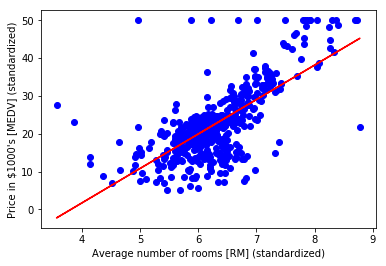

In [4]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()